<a href="https://colab.research.google.com/github/Ashishmehta786/ML/blob/main/Understanding_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding  Tensorflow

In [ ]:
# generally we import tensorflow in this manner
import tensorflow as tf

1) What is Tensorflow and what are tensors?

2) Tensor creation and tensor types

3) Eager execution and graph execution

4) How does a graph works in tensorflow and use of graphs in it

5) tf.math

6) tf.nn

7) tf.GradientTape

8) tf.keras overview and subclassing api

For understanding Tensorflow you just need to know linear algebra basic  graph theory and intermediate calculus with intermediate level of probability and statistics.

By it's name it is clear it's the flow of tensors and what are tensors in short just keep in mind tensors are multiple matrices or multiple vectors enclosed in a single container the main intution or work of tensor is the transformation it does .As matrices do a transformation to the graph linearly.
Let's see how does a matrix does a linear transformation through a code in python's library matplotlib by plotting the coordinate space.

In this way matix multiplication does transformation in the vector space as an intution of squishing streching the vector space and basis vectors like here it changed the initial vector  

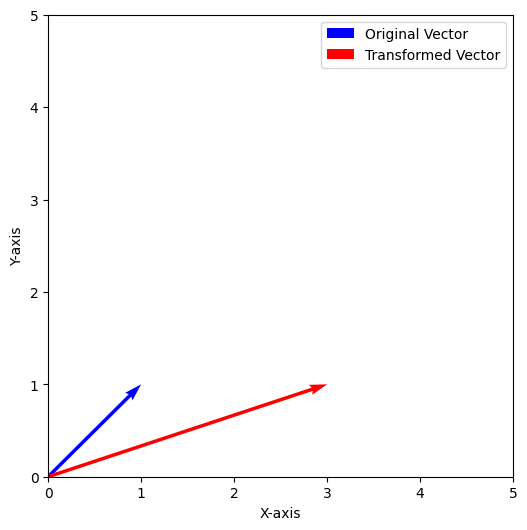

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2x2 tensor
tensor = np.array([[2, 1],
                   [1, 0]])

# Define a 2D vector
vector = np.array([1, 1])

# Apply the tensor transformation to the vector
transformed_vector = np.dot(tensor, vector)

# Plotting the original and transformed vectors
plt.figure(figsize=(6, 6))

# Original vector
plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original Vector')

# Transformed vector
plt.quiver(0, 0, transformed_vector[0], transformed_vector[1], angles='xy', scale_units='xy', scale=1, color='r', label='Transformed Vector')

# Set plot limits
plt.xlim(0, 5)
plt.ylim(0, 5)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

Here it changed the basis vector these new basis vectors will be our new i, j hat of 2d vector  space   

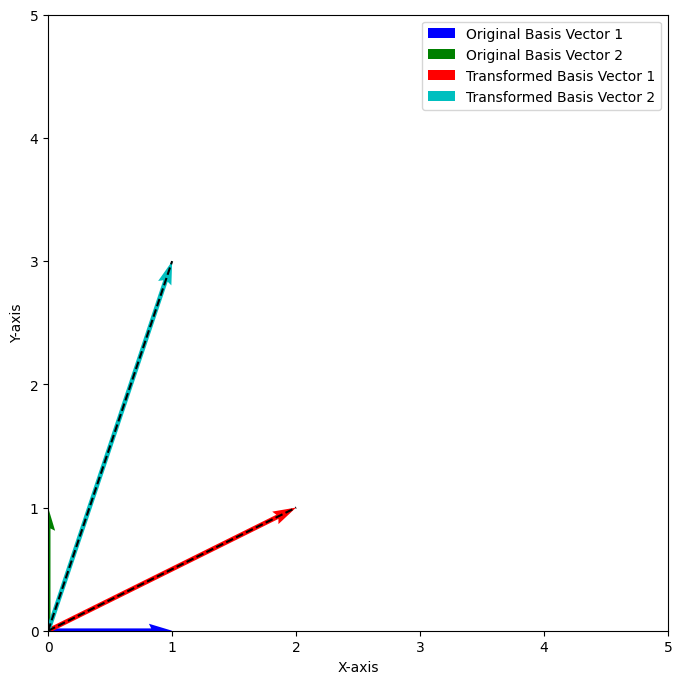

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2x2 tensor (linear transformation matrix)
tensor = np.array([[2, 1],
                   [1, 3]])

# Original basis vectors
original_basis = np.eye(2)

# Transformed basis vectors
transformed_basis = np.dot(tensor, original_basis)

# Plotting the original and transformed basis vectors with triangular representation
plt.figure(figsize=(8, 8))

# Original basis vectors
plt.quiver(0, 0, original_basis[0, 0], original_basis[1, 0], angles='xy', scale_units='xy', scale=1, color='b', label='Original Basis Vector 1')
plt.quiver(0, 0, original_basis[0, 1], original_basis[1, 1], angles='xy', scale_units='xy', scale=1, color='g', label='Original Basis Vector 2')

# Transformed basis vectors
plt.quiver(0, 0, transformed_basis[0, 0], transformed_basis[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label='Transformed Basis Vector 1')
plt.quiver(0, 0, transformed_basis[0, 1], transformed_basis[1, 1], angles='xy', scale_units='xy', scale=1, color='c', label='Transformed Basis Vector 2')

# Connect the vector and transformed basis vectors to form a triangular representation
plt.plot([0, transformed_basis[0, 0]], [0, transformed_basis[1, 0]], 'k--')
plt.plot([0, transformed_basis[0, 1]], [0, transformed_basis[1, 1]], 'k--')

# Set plot limits
plt.xlim(0, 5)
plt.ylim(0, 5)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

This below code gives intution of 3d transformation by matrix/rank 2 tensor

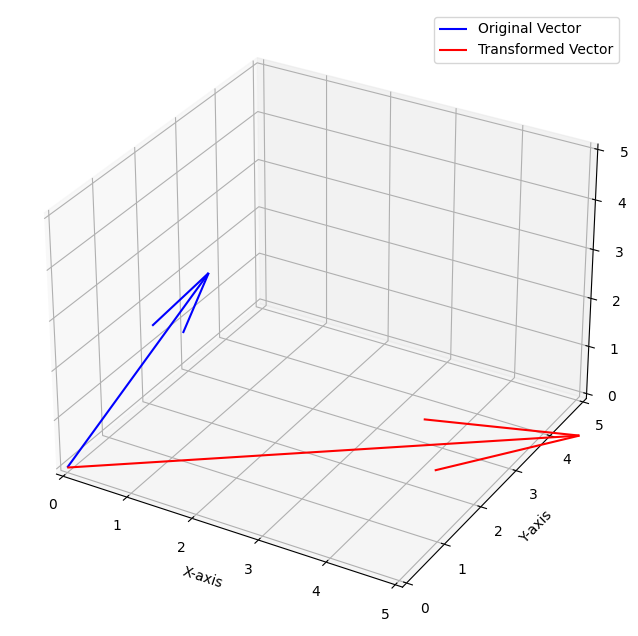

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a 3x3 tensor
tensor = np.array([[0, 3, 0],
                   [1, 1, 0],
                   [1, 0, 0]])

# Define a 3D vector
vector = np.array([1, 2, 3])

# Apply the tensor transformation to the vector
transformed_vector = np.dot(tensor, vector)

# Plotting the original and transformed vectors in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Original vector
ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color='b', label='Original Vector')

# Transformed vector
ax.quiver(0, 0, 0, transformed_vector[0], transformed_vector[1], transformed_vector[2], color='r', label='Transformed Vector')

# Set plot limits
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# Add labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

# Show the plot
plt.show()

#Tensor creation

# Most used Data types in tensorflow for tensors

#1) dtype=tf.float32
 this is the mostly used data type in tensorflow. It means it will store a float number with precision of about 32 bits the more the bits the more the precision there are different versions of float that is float16,float64.
#2) dtype=tf.int32
this data type is used for faster computation than float but lacks in the precision of small numbers as it has only integer numbers. There are different versions of int like int8,int16,int64.
#3)dtype=uint8
unit means unsigned int that is it onlyhandles positive integer values .it has different versions like unit16,unit32,unit64.
#4) dtype=tf.string
In tensorflow we generally not use string data type but if at some situations we can use it.

#1)Constant tensor
constanttensor=tf.constant(python_object or value , data_type, shape, name)

*By default constant tensor has data type as int32 that is 32 bit int that it uses 32 bits of memory and stores an integer value*

In [ ]:
tf.constant([2,7], dtype=tf.int32)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 7], dtype=int32)>

In [ ]:
constant_tensor_scalar=tf.constant(4,dtype=tf.float32)
value=[3,5]
constant_tensor_vector=tf.constant(value,dtype=tf.float32)
value2=[[1,2,3],[3,4,5]]
constant_tensor_matrix=tf.constant(value2,shape=(2,3),dtype=tf.float32)
constant_tensor=tf.constant([[[4,5],[7,8],[9,10]],[[1,2],[7,8],[3,1]],[[6,7],[6,7],[9,10]]])
print("zero rank tensor/ scalar ",constant_tensor_scalar,"\n\n","one rank  tensor/ vector",constant_tensor_vector,"\n\n","rank two tensor /matrix", constant_tensor_matrix)
print("\n","a multi rank tensor/full fledged tensor", constant_tensor)

zero rank tensor/ scalar  tf.Tensor(4.0, shape=(), dtype=float32) 

 one rank  tensor/ vector tf.Tensor([3. 5.], shape=(2,), dtype=float32) 

 rank two tensor /matrix tf.Tensor(
[[1. 2. 3.]
 [3. 4. 5.]], shape=(2, 3), dtype=float32)

 a mutli rank tensor/full fledged tensor tf.Tensor(
[[[ 4  5]
  [ 7  8]
  [ 9 10]]

 [[ 1  2]
  [ 7  8]
  [ 3  1]]

 [[ 6  7]
  [ 6  7]
  [ 9 10]]], shape=(3, 3, 2), dtype=int32)


We can set the shape of a tensor to be any but the  shape of python object from which we are making tensor  having row $ r$ and column $c$ that is $r\times c$ should be equal  to the product of old row and columns.

In [ ]:
constant_tensor2=tf.constant(value2,shape=(6,1),dtype=tf.float32)
print(constant_tensor2)

NameError: ignored

The tensors  except ragged tensors have the same number of elements in column row  Let's see with example

In [ ]:
a=tf.constant(
             [[1,4,5],
             [2,3]]# the number of elements are not same so it will give error
             )
print(a)

ValueError: ignored

Ragged tensor  can have different numbers of elements in columns.Let's see with example

In [ ]:
a=tf.ragged.constant(
             [[1,4,5],
             [2,3],[]]
             )
print(a)

<tf.RaggedTensor [[1, 4, 5], [2, 3], []]>


Other ways of initializing a ragged tensor is by rows or columns split let's get a deep dive in it.

from row split method - in this method we provide the indices of the python object and the indices are provided in row_split such a way such that the numbers provided in row_split are in sequence wise so as to do slicing of the value object let's see how we are doing the slicing

Suppose we provided $value=[1,2,3,4,5,6]$
And row_split= $[0,2,5]$ in row_split first we see $0,2$ it tells us that the first slice is $value[0:2]$ that is the elements of value between indices $ 0,2 $ therefore the first row of tensor will be $ value[0:2] $ then we will see $ 2,5$  for next slice it tells the next slice is $value[2:5]$ therefore the second row of tensor will be $value[2:5]$

In [ ]:
value=[1,2,3,4,5,6]
a=tf.RaggedTensor.from_row_splits(value,row_splits=[0,2,2,3,5,6])
print(a)

<tf.RaggedTensor [[1, 2], [], [3], [4, 5], [6]]>


Now we take row_splits =$[0,1,2,2,3]$ for value=$[1,2,3]$ here if we make pairs of row_splits they are $(0,1),(1,2),(2,2),(2,3)$ here we see  we have $(2,2)$ this will give us elements between indices of $2,2$ in value which is no one because there are no indices between $2,2$ there is element on $2$ but not between $2,2$ so it will give us empty tensor

In [ ]:
value1=[1,2,3]
a=tf.RaggedTensor.from_row_splits(value1,row_splits=[0,1,2,2,3])
print(a)

<tf.RaggedTensor [[1], [2], [], [3]]>


In the end of row_splits we have to give the total indices if we don't give it we will get error for example if we have value =$[2,3,4]$ the indices are $0,1,2$ that is we have $3$ indices it means in the end index of row_split we have to put $3$  that means row_split=$[0,2,3]$ such that to display the element between $2,3$ for this row split

If we don't put total no. Of indices at the end of row_split we will get the following error

In [ ]:
value=[1,2,3,4,5,6]
a=tf.RaggedTensor.from_row_splits(value,row_splits=[0,2,3,5])
print(a)

InvalidArgumentError: ignored

With this Raggedtensor.from_row_splits you can make any ragged tensor you don't need other methods to create ragged tensors method is sufficient. Also there is uniform length way let's discuss that it will make things more easy and less complex in some situations

In [ ]:
values=[7,8,9,10,11,12,13,14]
a=tf.RaggedTensor.from_uniform_row_length(values,uniform_row_length=2)
print(a)
#But the uniform_row_length must be divisible by the number of elements in the values otherwise it will give error

<tf.RaggedTensor [[7, 8],
 [9, 10],
 [11, 12],
 [13, 14]]>

Nested row splits like multiple for loops

In [ ]:
values=[1,2,3,4,5]
a=tf.RaggedTensor.from_row_splits(values,row_splits=[0,2,3,5])
print("single row split\n ",a,"\n")
a=tf.RaggedTensor.from_row_splits(a,row_splits=[0,2,3])
print("multiple row split\n",a)
#first [1,2] is on index 0 and [3] on index 1 and [4,5] on index 2 after the single split
# now I did second split (0,2,3) therefore the elements of 0,1 will be in a single row and index 2 element will be in different row
#This way we can do multiple splits

single row split
  <tf.RaggedTensor [[1, 2], [3], [4, 5]]> 

multiple row split
 <tf.RaggedTensor [[[1, 2], [3]], [[4, 5]]]>


To make this ragged tensor a single list we can use flat_values that is we will again reach to our original values.

In [ ]:
print(a.flat_values)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


For finding the rank of a ragged tensor use .ragged_rank with the ragged tensor object

In [ ]:
print(a.ragged_rank)

2


What is ragged rank and in general rank of any tensor?
it gives the effective dimensionality that is the number of non zero row or columns after applying linear transformations in the matric a very technical answer though!!

#Variables in tensorflow

A variable in a tensorflow is to be honestly saying is a complex stuff but in this section we will get some overview we will see in detail about variable in graph execution.

In [ ]:
#how to make variables in tensorflow
var1=tf.Variable([3,2],dtype=tf.float32)
print(var1)

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([3., 2.], dtype=float32)>


#Some operations on tensors

In all type of tensors in tensorflow we can use shape method , .numpy() , cast , reshape , add , subtract , matmul , divide , multiply methods we can use let's see  how can we do so.

In [ ]:
a1=tf.constant([[1,2],[3,4]],dtype=tf.float32)
a2=tf.constant([[4,5],[7,8]],dtype=tf.float32)
print("sum of a1\n",a1,"\nand a2\n",a2,"\nis\n",tf.add(a1,a2))

sum of a1
 tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32) 
and a2
 tf.Tensor(
[[4. 5.]
 [7. 8.]], shape=(2, 2), dtype=float32) 
is
 tf.Tensor(
[[ 5.  7.]
 [10. 12.]], shape=(2, 2), dtype=float32)


When we use tf.multiply there is element wise multiplication of each element we multiply Frist tensors $a_{11}$ element and multiply it with $a_{11}$ of second tensor this becomes our $a_{11}$ element that is we get  row 1 and column 1 element of the mutliplied tensor. As we see in addition of two tensors.

In [ ]:
a1=tf.constant([[7,8],[9,10]],dtype=tf.float16)
a2=tf.constant([[1,4],[5,6]],dtype=tf.float16)
print(a1,"\n\n",a2,"\n\n",tf.multiply(a1,a2))

tf.Tensor(
[[ 7.  8.]
 [ 9. 10.]], shape=(2, 2), dtype=float16) 

 tf.Tensor(
[[1. 4.]
 [5. 6.]], shape=(2, 2), dtype=float16) 

 tf.Tensor(
[[ 7. 32.]
 [45. 60.]], shape=(2, 2), dtype=float16)


In [ ]:
print("we can make tensor a numpy array like this",a1.numpy(),"\n")
print("we can find the shape of a tensor like this ",a1.shape,"\n")
print("in this way we can reshape the tensor ",tf.reshape(a1, shape=(4,1)))

we can make tensor a numpy array like this [[ 7.  8.]
 [ 9. 10.]] 

we can find the shape of a tensor like this  (2, 2) 

in this way we can reshape the tensor  tf.Tensor(
[[ 7.]
 [ 8.]
 [ 9.]
 [10.]], shape=(4, 1), dtype=float16)


Casting in tensorflow it means we can change the data type of a tensor

In [ ]:
a=tf.constant(2,dtype=tf.int32)
print(tf.cast(a,dtype=tf.float32))

tf.Tensor(2.0, shape=(), dtype=float32)


#Eager execution!!
When tensorflow was launched it wasn't pythonic at all means it was hard to debug and it didn't behaved like normal python as tensorflow uses graphs to do it's computation.Then the developers came with the idea of eager execution meaning the code with run in python it will not be converted into graphs. Eager execution made work of developers and begginers easy its easy to debug but it is slower than graph execution. In eager execution the pythonic functions are run at that time only. But in graph execution first computational graph gets build but does not does any computation in starting.

In [ ]:
#let's print the type of constant tensor
print(type(tf.constant(3)))#output is eager tensor


<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
def func(a,b):
  print("hello starting function")
  c=tf.matmul(a,b)
  print(c)

print(func(tf.constant([[2],[1]]),tf.constant([[1,3]])))

hello starting function
tf.Tensor(
[[2 6]
 [1 3]], shape=(2, 2), dtype=int32)
None


#Graph execution

In [ ]:
import tensorflow as tf
#tf.config.run_functions_eagerly(False)
#we can set eager execution to be not used as defaul via setting it to false

In [ ]:
#to make graph and do computations in graph we use @tf.function decorator or pass function in tf.function(func_name)
@tf.function
def func(a,b):
  d=tf.constant(2)
  print("hello starting function")
  c=tf.matmul(a,b)
  print(c)

print(func(tf.constant([[2],[1]]),tf.constant([[1,3]])))

hello starting function
Tensor("MatMul:0", shape=(2, 2), dtype=int32)
None


The output is weird in graph execution we wanted to print the value of c but its giving us its shape and name this is because of the graph execution is different and debugging is difficult  so we use tensorflows inbuilt  functions like here we us tf.print in replacement of print

In [ ]:
@tf.function
def func(a,b):
  print("hello starting function")
  c=tf.matmul(a,b)
  tf.print(c)

print(func(tf.constant([[2],[1]]),tf.constant([[1,3]])))

hello starting function
[[2 6]
 [1 3]]
None


and yes we resolved  the errors also sometimes if and for loop while loop doesn't works because in graph mode tensorflow but some are generated by auto graph a library which converts eager  code to graph executionable code  but its generally a good practise to  avoid eager code for stability and performance increment!





In [ ]:
 @tf.function
 def func():
# Your TensorFlow operations
  a = tf.constant([[2],[1]])
  b = tf.constant([[1,3]])
  c = a + b
  d = tf.matmul(a,b)
func()
# Log relevant information for TensorBoard
log_dir = "./logs/"
summary_writer = tf.summary.create_file_writer(log_dir)

with summary_writer.as_default():
    tf.summary.trace_on(graph=True,profiler=True)
    tf.summary.trace_export(name="model",step=0,profiler_outdir=log_dir)

%load_ext tensorboard

%tensorboard --logdir logs

The below image shows the graphs of two constants first added that is one operation and second one is matmul and there are two constants (const_1,const)  

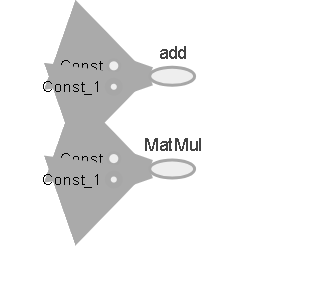

In [ ]:
from IPython.display import display,Image
display(Image("/content/png.png"))


For optimization and running the code in graphs in tensorflow v2 we have to use @tf.function decorator but this uses tf.autograph which makes the code to make it graph executionable as auto graph helps us to just use tf.function  decorator to use the benifit of graph execution and also easily.But in graph execution we face problems in debugging and some weird behaviour so to solve this @tf.py_function was created  it provides pythonic code and eager execution inside  computational graphs/tf.function decorator. If we change the input python functions in tf.function decorator then it again  makes a graph which includes the pythonic statements but if we keep the same pythonic statement only change the tensorflow operations the graph remains rame tf.function doesn't makes a new graph in that situation which causes the tensorflow to skip pythonic statements like if else while for loop print statements but tf.py_helps us in this situation too  it runs the code eagerly.

In [ ]:
#a perfect example from tensorflow docs for this

@tf.py_function(Tout=tf.float32)
def py_log_huber(x, m):
  print('Running with eager execution.')
  print(x)
  if tf.abs(x) <= m:
    return x**2
  else:
    return m**2 * (1 - 2 * tf.math.log(m) + tf.math.log(x**2))
print(py_log_huber(1.0,2.0))
print(py_log_huber(12.0,2.0))

Running with eager execution.
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
Running with eager execution.
tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(18.334076, shape=(), dtype=float32)


@tf.py_function helps us to run eagerly everytime

In [ ]:
@tf.function
def tf_wrapper(x):
  print('Tracing wrapper.')
  m = tf.constant(2.0)
  return py_log_huber(x,m)
print(tf_wrapper(1.0))
print(tf_wrapper(11.0))
print(tf_wrapper(1.0))


Tracing wrapper.
Running with eager execution.
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
Tracing wrapper.
Running with eager execution.
tf.Tensor(11.0, shape=(), dtype=float32)
tf.Tensor(17.637985, shape=(), dtype=float32)
Running with eager execution.
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


running with eager execution was printed 3 times but we only changed input 2 times that is it even works eagerly/runs directly without  creating computational graphs even if its under @tf.function

#@tf.py_function always runs the code in eager mode even if used inside @tf.function decorator

In [ ]:
#without tf.py_function
@tf.function
def py_log_huber(x, m):
  print('tracing.')
  print(x)
  if tf.abs(x) <= m:
    return x**2
  else:
    return m**2 * (1 - 2 * tf.math.log(m) + tf.math.log(x**2))
print(py_log_huber(1.0,tf.constant(2.0)))
print(py_log_huber(1.0,tf.constant(3.0)))



tracing.
1.0
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


only traced as even if we change the tensorflow objects the computational graph remains the same and is not traced again

In [ ]:
@tf.function
def py_log_huber(x, m):
  print('Tracing.')
  print(x)
  if tf.abs(x) <= m:
    return x**2
  else:
    return m**2 * (1 - 2 * tf.math.log(m) + tf.math.log(x**2))
print(py_log_huber(1.0,tf.constant(2.0)) )
print(py_log_huber(2.0,tf.constant(2.0))  )


Tracing.
1.0
tf.Tensor(1.0, shape=(), dtype=float32)
Tracing.
2.0
tf.Tensor(4.0, shape=(), dtype=float32)


in above code it creates two times computational graph as pythonic object was changed from 1.0 to 2.0

#tf.nn
this  module has the building blocks thngs of a neural network. It contains low level apis mostly that is things from scratch and with most optimizations can be made from tf.nn


tf.nn(layers) currently it has an RNN cell layer and a CNN(Convolutional neural network) and RNN(Recurrent neural networks ) first let's try to fully understand tensorflow then we cn jump over neural networks
let's discuss about some activation function these are just mathematical functions which introduce non linearity to the architecture which helps to converge multi layer  perceptrons easily ove the data.

#tf.nn(most useful activation functions activation function)

#1)sigmoid function its formula is:
$\Huge\frac{1}{1+e^{-x}}$

In [ ]:
print(tf.nn.sigmoid(2.0))#input dtype must be float

<tf.Tensor: shape=(), dtype=float32, numpy=0.8807971>

#2) tanh function its formula is:
$\Huge \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$

In [ ]:
print(tf.nn.tanh(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9640276>

#3) Relu function its formula is :
$\Huge \max(0,x)$

In [ ]:
print(tf.nn.relu(-1))

<tf.Tensor: shape=(), dtype=int32, numpy=0>

#4) Most used activation function in LLM 'gelu' its formula is complex though :
$\Huge x\times P(X<=x)$
it's normal distirbutions concept

In [ ]:
print(tf.nn.gelu(1.8))

tf.Tensor(1.7353252, shape=(), dtype=float32)


#5) softmax again most used in LLM like chatgpt its a probablistic activation function its formula is:
$\Huge softmax(z)_i=\frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_i}}$

In [ ]:
print(tf.nn.softmax(tf.constant([1,2,3],dtype=tf.float32)))

tf.Tensor([0.09003057 0.24472848 0.66524094], shape=(3,), dtype=float32)


#tf.math
it also has low level apis which are useful the main goal in this jupyter nb is to give attention to eager vs graph execution

#tf.keras
a combo of tf.nn and tf.math and some extra layers i also made over this as highlevelapi.ipynb

#tf.GradientTape
The most useful function in tensorflow is gradient tape as every neural network in tensorflow requires gradient calculations. Let's get into a deeper dive in GradientTape.  Gradient is the differentiation of a multi variable function $f(x,y,z,........)$  $\frac{\partial{f(x,y,z..)}}{\partial{x}}$ and   $\frac{\partial{f(x,y,z..)}}{\partial{y}}$  and  $\frac{\partial{f(x,y,z..)}}{\partial{z}}$  so on for every independent  variable

main difference  in graph execution of gradient tape and eager execution is time difference and we also have to take care of conditional pythonic and print pythonic statements

In [ ]:
def f(a,b):
  with tf.GradientTape() as tape:
    tape.watch(a)
    tape.watch(b)
    z=tf.add(a**2,b)

  grads=tape.gradient(z,[b,a],unconnected_gradients=tf.UnconnectedGradients.ZERO)
  tf.print(grads)
a=tf.constant([2,3],dtype=tf.float32)
b=tf.constant([0,34],dtype=tf.float32)
print(f(a,b))

#Doing in Graph execution

In [ ]:
@tf.function
def f(a,b):
  with tf.GradientTape() as tape:
    tape.watch(a)
    tape.watch(b)
    z=tf.add(a**2,b)

  grads=tape.gradient(z,[b,a],unconnected_gradients=tf.UnconnectedGradients.ZERO)
  tf.print(grads)
a=tf.constant([2,3],dtype=tf.float32)
b=tf.constant([0,34],dtype=tf.float32)
print(f(a,b))

[[1 1], [4 6]]


# Why do we get gradients zero or none

#if input tensors are not watched

In [ ]:
#here inputs are constants and not being watched if they were variables then this would not happen by default the tape will watch variables
def f(a,b):
  with tf.GradientTape() as tape:

    z=tf.add(a**2,b)

  grads=tape.gradient(z,[b,a],unconnected_gradients=tf.UnconnectedGradients.ZERO)
  tf.print(grads)
a=tf.constant([2,3],dtype=tf.float32)
b=tf.constant([0,34],dtype=tf.float32)
print(f(a,b))

[[0 0], [0 0]]


#if there is no relation between two input tensors that is z or if you made it outside of the tape scope

In [ ]:
z=tf.add(a**2,b)
def f(a,b):
  with tf.GradientTape() as tape:
    tape.watch(a)
    tape.watch(b)


  grads=tape.gradient(z,[b,a],unconnected_gradients=tf.UnconnectedGradients.ZERO)
  tf.print(grads)
a=tf.constant([2,3],dtype=tf.float32)
b=tf.constant([0,34],dtype=tf.float32)
print(f(a,b))

[[0 0], [0 0]]


#If you made the dtype of inputs to be int

In [ ]:

def f(a,b):
  with tf.GradientTape() as tape:
    tape.watch(a)
    tape.watch(b)
    z=tf.add(a**2,b)

  grads=tape.gradient(z,[b,a],unconnected_gradients=tf.UnconnectedGradients.ZERO)
  tf.print(grads)
a=tf.constant([2,3],dtype=tf.int32)
b=tf.constant([0,34],dtype=tf.int32)
print(f(a,b))


[[0 0], [0 0]]


#If there was implicit function in between the tape and it wasn't watched in correct order

In [ ]:
def func(a):
  return tf.cast(a**2,dtype=tf.float32)
d=func(a)
def f(a,b):
  with tf.GradientTape() as tape:
    tape.watch(d)
    tape.watch(b)
    tape.watch(a)#wrong order of tape first watch should be done to that tensor which doesnt depends on anyone
    z=tf.add(d,b)

  grads=tape.gradient(z,[b,a],unconnected_gradients=tf.UnconnectedGradients.ZERO)
  tf.print(grads)
a=tf.constant([2,3],dtype=tf.float32)
b=tf.constant([0,34],dtype=tf.float32)
print(f(a,b))

[[1 1], [0 0]]


In [ ]:
@tf.function
def f(a,b):
  with tf.GradientTape() as tape:
    d=tf.Variable(1)
    tape.watch(a)
    tape.watch(b)
    z=tf.add(a**2,b)

  grads=tape.gradient(z,[b,a],unconnected_gradients=tf.UnconnectedGradients.ZERO)
  tf.print(grads)
a=tf.Variable([2,3],dtype=tf.float32)
b=tf.Variable([0,34],dtype=tf.float32)
print(f(a,b))

ValueError: ignored

#When we use @tf.function decorator it makes a computational graph basic structure of the function the paramters passed in that  time makes the computational graph after the graph is created we can't add Variables inside the functions so as to provide the variables we can pass through the function  before thta we have to make the variables outside the function so as to avoid the error.

In [ ]:
@tf.function
def f1(a1,b1,d1):

  with tf.GradientTape() as tape:

    tape.watch(a1)
    tape.watch(b1)
    z1=tf.add(a1**2,b1)

  grads1=tape.gradient(z1,[b1,a1],unconnected_gradients=tf.UnconnectedGradients.ZERO)
  tf.print(grads1)
a1=tf.Variable([2,3],dtype=tf.float32)
b1=tf.Variable([0,34],dtype=tf.float32)
d1=tf.Variable(1)
print(f1(a1,b1,d1))

[[1 1], [4 6]]
